In [1]:
!pip install -q datasets transformers librosa jiwer accelerate
!pip install -U datasets transformers accelerate evaluate

from google.colab import drive
from huggingface_hub import notebook_login

drive.mount("/content/drive")
notebook_login()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 109.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from datasets import load_dataset, Dataset
from itertools import islice

# 학습용 (train split)
ko_train = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ko", split="train", streaming=True), 192))
en_train = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "en", split="train", streaming=True), 200))
ja_train = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ja", split="train", streaming=True), 200))
de_train = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "de", split="train", streaming=True), 200))

train_dataset = Dataset.from_list(ko_train + en_train + ja_train + de_train)

# 검증용 (validation split - streaming 적용, 개수 제한)
ko_val = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ko", split="validation", streaming=True), 100))
en_val = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "en", split="validation", streaming=True), 100))
ja_val = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ja", split="validation", streaming=True), 100))
de_val = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "de", split="validation", streaming=True), 100))

val_dataset = Dataset.from_list(ko_val + en_val + ja_val + de_val)

# 테스트용 (test split - streaming 적용, 개수 제한)
from itertools import islice

ko_test = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ko", split="test", streaming=True), 100))
en_test = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "en", split="test", streaming=True), 100))
ja_test = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ja", split="test", streaming=True), 100))
de_test = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "de", split="test", streaming=True), 100))

test_dataset = Dataset.from_list(ko_test + en_test + ja_test + de_test)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/14.7k [00:00<?, ?B/s]

common_voice_13_0.py:   0%|          | 0.00/8.18k [00:00<?, ?B/s]

languages.py:   0%|          | 0.00/3.65k [00:00<?, ?B/s]

release_stats.py:   0%|          | 0.00/65.4k [00:00<?, ?B/s]

The repository for mozilla-foundation/common_voice_13_0 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/mozilla-foundation/common_voice_13_0.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Reading metadata...: 192it [00:00, 540.72it/s]
Reading metadata...: 1013968it [00:23, 43488.82it/s]
Reading metadata...: 7071it [00:00, 24116.09it/s]
Reading metadata...: 540437it [00:15, 34319.17it/s]
Reading metadata...: 105it [00:00, 487.06it/s]
Reading metadata...: 16372it [00:00, 32629.39it/s]
Reading metadata...: 4961it [00:01, 2714.27it/s]
Reading metadata...: 16143it [00:00, 24922.16it/s]
Reading metadata...: 131it [00:00, 756.20it/s]
Reading metadata...: 16372it [00:00, 34595.67it/s]
Reading metadata...: 4961it [00:00, 13607.00it/s]
Reading metadata...: 16143it [00:00, 35538.51it/s]


In [3]:
from transformers import WhisperProcessor, WhisperForConditionalGeneration

checkpoint = "openai/whisper-tiny"
processor = WhisperProcessor.from_pretrained(checkpoint)
model = WhisperForConditionalGeneration.from_pretrained(checkpoint)
model.config.forced_decoder_ids = None
model.config.suppress_tokens = []

preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.98k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/151M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.75k [00:00<?, ?B/s]

In [4]:
def prepare_dataset(example):
    audio = example["audio"]
    example["input_features"] = processor.feature_extractor(audio["array"], sampling_rate=16000).input_features[0]
    example["labels"] = processor.tokenizer(example["sentence"]).input_ids
    return example

processed_dataset_train = train_dataset.map(prepare_dataset, remove_columns=train_dataset.column_names)
processed_dataset_val = val_dataset.map(prepare_dataset, remove_columns=val_dataset.column_names)
processed_dataset_test = test_dataset.map(prepare_dataset, remove_columns=test_dataset.column_names)


Map:   0%|          | 0/792 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

In [5]:
from dataclasses import dataclass
from typing import Any, Dict, List, Union
import torch

@dataclass
class DataCollatorSpeechSeq2SeqWithPadding:
    processor: Any
    padding: Union[bool, str] = True

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:
        input_features = [{"input_features": f["input_features"]} for f in features]
        label_features = [{"input_ids": f["labels"]} for f in features]
        batch = self.processor.feature_extractor.pad(input_features, return_tensors="pt")
        labels_batch = self.processor.tokenizer.pad(label_features, return_tensors="pt")
        labels = labels_batch["input_ids"].masked_fill(labels_batch.attention_mask.ne(1), -100)
        batch["labels"] = labels
        return batch

data_collator = DataCollatorSpeechSeq2SeqWithPadding(processor=processor)


In [6]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/WhisperCheckpoints/run_tiny_lr2",
    per_device_train_batch_size=8,
    learning_rate=3e-5,
    num_train_epochs=5,
    logging_steps=10,
    save_strategy="epoch",
    fp16=True,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=processed_dataset_train,
    tokenizer=processor,
    data_collator=data_collator
)

<ipython-input-6-309c3641ed83>:14: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [7]:
trainer.train()

Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.43.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Step,Training Loss
10,6.985500
20,5.046300
30,4.723500
40,4.713400
50,4.599400
60,4.454900
70,4.437600
80,4.350800
90,4.337600
100,4.357900


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:3339: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 448, 'suppress_tokens': [], 'begin_suppress_tokens': [220, 50257]}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


TrainOutput(global_step=495, training_loss=2.006676580929997, metrics={'train_runtime': 461.4018, 'train_samples_per_second': 8.583, 'train_steps_per_second': 1.073, 'total_flos': 9.74907850752e+16, 'train_loss': 2.006676580929997, 'epoch': 5.0})

In [8]:
save_path = "/content/drive/MyDrive/WhisperCheckpoints/run_tiny_lr2"
model.save_pretrained(save_path)
processor.save_pretrained(save_path)

[]

In [9]:
import torch
from jiwer import wer
from tqdm import tqdm

lang_list = ["ko", "en", "ja", "de"]
lang_wer_results = {}

for lang in lang_list:
    print(f"🌍 Language: {lang}")
    lang_data = [x for x in val_dataset if x["locale"] == lang]

    predictions, references = [], []

    for sample in tqdm(lang_data):
        input_features = processor.feature_extractor(
            sample["audio"]["array"], sampling_rate=16000, return_tensors="pt"
        ).input_features.to(model.device)

        decoder_ids = processor.get_decoder_prompt_ids(language=sample["locale"], task="transcribe")
        model.config.forced_decoder_ids = decoder_ids

        with torch.no_grad():
            predicted_ids = model.generate(input_features)

        transcription = processor.batch_decode(predicted_ids, skip_special_tokens=True)[0]
        predictions.append(transcription)
        references.append(sample["sentence"])

        print(f"🔹 Predicted: {transcription}")
        print(f"🔸 Reference: {sample['sentence']}")

    score = wer(references, predictions)
    lang_wer_results[lang] = score
    print(f"✅ {lang.upper()} WER: {score:.4f}")


🌍 Language: ko


  0%|          | 0/100 [00:00<?, ?it/s]Due to a bug fix in https://github.com/huggingface/transformers/pull/28687 transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English.This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
  1%|          | 1/100 [00:00<01:13,  1.35it/s]

🔹 Predicted: クオープンシーへえ山崎県減町に来るんだが絶対しこうあんけ처럼サラスだった
🔸 Reference: 그와 동시에 애상적이던 기분은 구름과 같이 흩어지고 안개처럼 스러졌다.


  2%|▏         | 2/100 [00:01<00:45,  2.14it/s]

🔹 Predicted: 雨에서 또 기차는 도내비가 본인다는 바람에 숨도 안이しく 억지 못하였다.
🔸 Reference: 하면서도 기천은 동혁이가 먹는다는 바람에 숨도 아니 쉬고 쪼옥 들이켰다.


  3%|▎         | 3/100 [00:01<00:39,  2.47it/s]

🔹 Predicted: 優秀会社会的技術があるいは、ポテンとご覚えない現象に沿っているペンクにしている
🔸 Reference: 의사에게 죽음의 선고를 받은 줄도 모르는 영신은 주사 기운에 조금 의식을 회복하였다.


  5%|▌         | 5/100 [00:01<00:27,  3.51it/s]

🔹 Predicted: ブール에とタニャ念念ながら、その彼は何に、動描いてくると矛盾と描いていない
🔸 Reference: 무릇 경영은 의논함으로 성취하나니 모략을 베풀고 전쟁할지니라
🔹 Predicted: 来にいたテレッドコーディッター
🔸 Reference: 아니다 결코 아니다.


  7%|▋         | 7/100 [00:02<00:18,  4.90it/s]

🔹 Predicted: ごめんなんそれやつばに行為さかけ
🔸 Reference: 공연한 소리 하지 말고 어서 가세.
🔹 Predicted: 雲田県南方法府町町
🔸 Reference: 선비는 받아 가지고 간난의 뒤를 따랐다.


  8%|▊         | 8/100 [00:02<00:21,  4.25it/s]

🔹 Predicted: 世界北部에서는 보다도 못決定その 보다도 바랜 간장에서는 서피스러움 눈에부터 시작하니깊다.
🔸 Reference: 새벽배송보다도 로켓배송보다도 빠른 양자 배송 서비스를 오늘부터 시작합니다.


  9%|▉         | 9/100 [00:02<00:20,  4.36it/s]

🔹 Predicted:  청완한 일이�뚜그를 타어 남은ソ우소개 될 수 있는다.
🔸 Reference: 청하는 이쪽 노를 저으면서 소리를 지른다.


 11%|█         | 11/100 [00:03<00:21,  4.23it/s]

🔹 Predicted: やろうさらにアップ도 한 가지은 다가서妙、ケーキャンペール困難を利用に近づいている人間に近づいている
🔸 Reference: 여러 사람의 앞으로 한 걸음 다가서며 그 검붉은 얼굴이 매우 긴장해진다.
🔹 Predicted: 野町に酒汁乾杯も多く 있는덕도
🔸 Reference: 여전히 사건 파악을 못 하고 있는데도?


 13%|█▎        | 13/100 [00:03<00:17,  5.01it/s]

🔹 Predicted: 次国国陈利inen固定するなんて立体的勾掛盾観察
🔸 Reference: 즐겁고 재미있는 콘텐츠를 만들 작가를 모집합니다.
🔹 Predicted: 二個でで、つりそこからよ
🔸 Reference: 이거리를 둘이서 걸어요.


 15%|█▌        | 15/100 [00:03<00:15,  5.50it/s]

🔹 Predicted: こんなに念念念念念念が動作部員には、我々で人間に減らった
🔸 Reference: 간난이는 생긋 웃어 보이며 머리를 흔들었다.
🔹 Predicted: 母親池本から遊びに来た
🔸 Reference: 무어가 무언지 분간할 수 없는 나는 이렇게 물었다.


 16%|█▌        | 16/100 [00:04<00:16,  5.01it/s]

🔹 Predicted: こんなとに何度不愚映像に来たら、ってとに何度に飲んだよ。
🔸 Reference: 국무총리는 국회의 동의를 얻어 대통령이 임명한다.


 18%|█▊        | 18/100 [00:04<00:15,  5.24it/s]

🔹 Predicted: これ、実に野板をパイッキーの百杯ほど着こういらなった
🔸 Reference: 부르짖으며 발길로 벽을 걷어차고 일어났다.
🔹 Predicted: 다운 Israel wurde高い간 말을 하고도 가슴이 있었다.
🔸 Reference: 나오는 줄 모르고 이런 말을 하고도 가슴이 선뜩하였다.


 19%|█▉        | 19/100 [00:04<00:15,  5.21it/s]

🔹 Predicted: 처키에 도냥산으로 참 동사관계가 나을껍니깐
🔸 Reference: 저 뒤에 동영상으로 주암동 사건 개요가 나올 겁니다.


 21%|██        | 21/100 [00:05<00:15,  5.25it/s]

🔹 Predicted: キール은 점점 난 말하였기에는 서자까올하기 위해서는 그 위에 서치기 깨끗다 하늘은 내가
🔸 Reference: 게으른 자는 말하기를 사자가 밖에 있은즉 내가 나가면 거리에서 찢기겠다 하느니라
🔹 Predicted: 그러면 그의 우라 붙였다.
🔸 Reference: 그럼, 내일 오랍쇼니까?


 22%|██▏       | 22/100 [00:05<00:15,  4.92it/s]

🔹 Predicted: 来念단 말에 비착我인 다음에 그은보대책을 서하여��러웠습니다.
🔸 Reference: 그는 나를 밀쳐 버린 다음에 그 음보를 들고서 읽기 시작하였습니다.


 23%|██▎       | 23/100 [00:05<00:18,  4.26it/s]

🔹 Predicted: てりこえ一개서、タメでアップケチューブアニューの合わせを満たにしたとおり、
🔸 Reference: 그리고 이 집에서 옥점이를 어떻게 귀여워하는 것을 잠시간이라도 알 수가 있다.


 24%|██▍       | 24/100 [00:05<00:18,  4.05it/s]

🔹 Predicted: 았다ったち欲しい念念奈良府部屋がってのようなで、ハンサクリームに来た
🔸 Reference: 아까까지 영신은 그 불을 얕은 하늘의 별들이 반짝이는 줄로만 알고있었다.


 25%|██▌       | 25/100 [00:09<01:25,  1.14s/it]

🔹 Predicted: 我々は南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、南板、
🔸 Reference: 의심하는 마음과 한꺼번에 일어나는 것은 질투였다.


 27%|██▋       | 27/100 [00:09<00:50,  1.44it/s]

🔹 Predicted: こういうキメy 구차와 이能mageに民に猫を徹底で食べたべくら、この雇布に雇山を出てたら、高くこっちの小があった
🔸 Reference: 골김에 그저 이놈의 장인님, 하고 댓돌에다 메꼰코 우리 고향으로 내뺄까 하다가 꾹꾹 참고 말았다.
🔹 Predicted: やばけ一つに暇いちんちゃうんで
🔸 Reference: 여보게 김첨지


 29%|██▉       | 29/100 [00:10<00:31,  2.29it/s]

🔹 Predicted: 国家的手をさたお念観光ポークは何か県美雲町
🔸 Reference: 갑자기 튀어져 나오는 광포, 거기 연한 쾌미, 흥소
🔹 Predicted: 대감독이 그의 산신을 훌쩡하며
🔸 Reference: 뜨거운 볕이 그의 전신을 후끈하게 하였다.


 30%|███       | 30/100 [00:13<01:33,  1.34s/it]

🔹 Predicted: 我々が我々を御御部屋においては、単に大きest 집は、一つの人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間の一人間
🔸 Reference: 어리석은 자로 슬기롭게 하며 젊은 자에게 지식과 근신함을 주기 위한 것이니


 32%|███▏      | 32/100 [00:16<01:33,  1.38s/it]

🔹 Predicted: 国家府に始まる時代、お前に南区において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において会社において
🔸 Reference: 그 여학생인지 만지가 한참은 매우 때깔을 빼며 입술을 꼭 다문 채 김첨지를 거들떠보지도 않았다.
🔹 Predicted: 浜松県平野市町
🔸 Reference: 한마디를 남기고 동혁은 구두징 소리를 뚜벅뚜벅 내며 골목 밖으로 나가 버린다.


 34%|███▍      | 34/100 [00:17<00:50,  1.30it/s]

🔹 Predicted: その仙波が何度なく、多分ひめくるじまれ
🔸 Reference: 스스로가 형편없다고 생각하지 말라.
🔹 Predicted: 阿公 was also a late-day town to see commonplace in Kondon Island with her.
🔸 Reference: 하고 무엇을 알아챘다는 듯이 가만히 창하의 계속하는 말만 듣고 있다.


 35%|███▌      | 35/100 [00:17<00:41,  1.58it/s]

🔹 Predicted: やはりに度の上がりの関係にもすべてポニュニティドルにしながらやりたっぽく
🔸 Reference: 권력을 휘두르는 그 정치인의 모습을 보며 대중들이 실망을 느꼈다.


 36%|███▌      | 36/100 [00:17<00:33,  1.93it/s]

🔹 Predicted: このように、一つ까지おすでるヨースラスでながら飲むよ、タッキリ
🔸 Reference: 그들이 집까지 왔을 때는 어슬어슬한 황혼이었다.


 38%|███▊      | 38/100 [00:19<00:40,  1.52it/s]

🔹 Predicted: 국hearerの武田町にも、静岡の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町の町
🔸 Reference: 그 기회론을 주장하는 사람은, 유명한 음악 비평가 K씨였었다.
🔹 Predicted: モデャンって書念もどこか人間は言われるやつ
🔸 Reference: 무대 앞에 서면 모두가 긴장하기 마련이야.


 40%|████      | 40/100 [00:20<00:24,  2.41it/s]

🔹 Predicted: 大阪者物やっぱりスプレイがリパッションから取った
🔸 Reference: 따라서 물 먹고 싶은 생각이 버쩍 들었다.
🔹 Predicted: 本身なにゃんせはリンクの進みたくて、
🔸 Reference: 삼십 년이라는 세월이 흘렀습니다.


 42%|████▏     | 42/100 [00:20<00:16,  3.42it/s]

🔹 Predicted: みみなもersがモールが飽飽きていこうなる
🔸 Reference: 내일이나 모레나 그 어느 즐거운 날에
🔹 Predicted: 佐久の上げなおついが飲み物であったら、
🔸 Reference: 저녁이 되며 아침이 되니 이는 네째 날이니라


 43%|████▎     | 43/100 [00:23<01:07,  1.18s/it]

🔹 Predicted: 百分岡山県美国町、北京町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、町、�
🔸 Reference: 밝은 달은 우리 가슴 일편단심일세
🔹 Predicted: 県川町
🔸 Reference: 네가 나빠


 45%|████▌     | 45/100 [00:24<00:40,  1.34it/s]

🔹 Predicted: 困難の目、どこに広がる前かつに含む人間だった、無料理を取り除くので、自然が含む人間を取り除くので、
🔸 Reference: 간난이는 여공이 들어가던 말까지 하려다가 이런 말은 좀더 기다려서 해주리라 하였다.


 46%|████▌     | 46/100 [00:24<00:33,  1.63it/s]

🔹 Predicted: 茨城市場は駅でなお店長に山根市場の自己覚alte
🔸 Reference: 만일 제가 그대로 단결에 휙 뿌리치고 가보게.


 47%|████▋     | 47/100 [00:27<01:08,  1.30s/it]

🔹 Predicted: 今度の上げらっきりはポイントにおいては、未来に出たのかにおいては、未来に出たのかにおいては、未来に出たのかにおいては、未来に出たのかにおいては、未来に出たのかにおいては、未来に出たのかにおいては、未来に出たのかにおいては、未来に出たのかにおいては、未来に出たのかにおいては、未来に出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに出たのかに
🔸 Reference: 감독이 이렇게 와꾸를 돌리게 되면 으레 이십 전 벌금을 물게 되는 것이다.


 48%|████▊     | 48/100 [00:27<00:53,  1.03s/it]

🔹 Predicted: 岐山市町が多くなるより、キーサービスの上げたので、そのような技術を通じて、
🔸 Reference: 기적이 나타나기를 빌고 바라는 미신 비슷한 생각에 잠겨 보기도 또한 이번이 처음이다.


 50%|█████     | 50/100 [00:31<01:01,  1.23s/it]

🔹 Predicted: くらい、手段、ちゃくちゃもなく、ちゃうまくちゃ、飲飾、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取浮、取
🔸 Reference: 비가 제법 장마 때처럼 주룩주룩 쏟아지기 시작한다.
🔹 Predicted: 映画上がるものは、その映画によく叩きました。
🔸 Reference: 이래저래 영신은 근처 동리의 소위 재산가 계급에게는 인심을 몹시 잃었다.


 51%|█████     | 51/100 [00:34<01:29,  1.82s/it]

🔹 Predicted: 用心に飽き出すと、その場合は、その中にアメリュームに乗せても、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつも上がる、いつ
🔸 Reference: 영신은 가슴속으로부터 치밀어 오는 울음을 참느라고 잇자국이 나도록 손가락을 깨문다.


 52%|█████▏    | 52/100 [00:37<01:47,  2.23s/it]

🔹 Predicted: 大阪府町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町
🔸 Reference: 따라서 인력거에 앉아 서울의 번잡한 도시를 향하여 달려오던 선비를 눈앞에 그려 보았다.


 54%|█████▍    | 54/100 [00:38<00:55,  1.21s/it]

🔹 Predicted: ごちそうさらに、僕が立即さらたんじゃん、始まってさらにするのがシャンネルボタンをご覚えます。
🔸 Reference: 그저 들어온 복도 박차 던져 내지 못해서 애쓰는 것이 아니고 무엇이냐.
🔹 Predicted: 춘우가 그다운 것이 말을 되겠어.
🔸 Reference: 그가 그 나무 실과를 내게 주므로 내가 먹었나이다


 55%|█████▌    | 55/100 [00:38<00:43,  1.04it/s]

🔹 Predicted: Nikobi-Kabunai-Mei-Mei-Waltzikolbe-Berachung war noch zu übernachten und schimm an der Burgos-Dinsucht.
🔸 Reference: 네가 네 아내의 말을 듣고 내가 너더러 먹지 말라한 나무 실과를 먹었은즉


 56%|█████▌    | 56/100 [00:41<01:12,  1.64s/it]

🔹 Predicted: 浜西兵庫村町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町
🔸 Reference: 병자의 몸은 벌써 싸늘하게 식었으며 얼굴이 파랗게 되었다.


 58%|█████▊    | 58/100 [00:42<00:37,  1.13it/s]

🔹 Predicted: この昔は、その空間は、その犬は、その矛盾からやつしまう
🔸 Reference: 그러고 알 수 없는 괴로운 경우에서 저를 끌어내어 주셔요.
🔹 Predicted: 始終はあるクリカンです。
🔸 Reference: 지금 바로 입금 가능해?


 60%|██████    | 60/100 [00:42<00:21,  1.88it/s]

🔹 Predicted: 意味は、おつまえたのでしょうか、おつまえたのでしょうか、おつまえた
🔸 Reference: 이리하여 주화조로서 탄주는 끝이 났습니다.
🔹 Predicted: 今度の代表の足ともらえられるがあった
🔸 Reference: 그는 오던 길을 다시 종로로 향해 갔다.


 61%|██████    | 61/100 [00:42<00:18,  2.17it/s]

🔹 Predicted: その便宜に行為に行為を行為するとおり、会場に合わせるとこは、そのようなとこは、
🔸 Reference: 선비는 감독이 그를 부를 터이지 하고 하루 종일 가슴이 두근거렸다.


 62%|██████▏   | 62/100 [00:43<00:15,  2.48it/s]

🔹 Predicted: お家みのようなおなかが進歩で立ちをパナン Montenegroにお店を買った
🔸 Reference: 옥점이는 어느 때나 신철이를 잊지 못하는 반면에 그만큼 더 미웠던 것이다.


 64%|██████▍   | 64/100 [00:43<00:10,  3.38it/s]

🔹 Predicted:  그들은 그기업는 선비를 보며 감격이 되서 변단한 나무가 늘어난 듯하였다.
🔸 Reference: 그들은 풀기 없는 선비를 보며 감독에게서 단단한 나무람을 들은 듯하였다.
🔹 Predicted:  즐거운 나랭고 고구마일 것이다.
🔸 Reference: 즐거운 날은 오고 말 것이다.


 65%|██████▌   | 65/100 [00:43<00:10,  3.41it/s]

🔹 Predicted:  만저럭을すのが、よくかざんソフィスティー、性格しちいっぱいのしかし、
🔸 Reference: 먼저 말씀하여 둘 것은 섭섭히 생각하시지 말으십시오.


 66%|██████▌   | 66/100 [00:44<00:09,  3.56it/s]

🔹 Predicted:  보기는 육수가 말호쩍포를 하는 대답的 뒤로 손사람이 마넣었다.
🔸 Reference: 무기명으로 투표를 하는 데도 대필로 쓴 사람이 많았다.


 68%|██████▊   | 68/100 [00:44<00:07,  4.35it/s]

🔹 Predicted:  배가 보일지구야 가리ott 않은 것이 알꿈할 동차가 보인다.
🔸 Reference: 대답을 듣고야 가겠다는 듯이 말똥말똥 쳐다본다.
🔹 Predicted: 凡月間천억 식사를 먹으면 더もいい일까?
🔸 Reference: 배고픈데 지금 저녁 식사를 먹으면 너무 이를까?


 69%|██████▉   | 69/100 [00:44<00:06,  4.51it/s]

🔹 Predicted: 그는 기침을 안하려고 이불고깜은 허의 술 시지 않았다.
🔸 Reference: 그는 기침을 안 하려고 입을 꼭 다문 후에 숨을 쉬지 않았다.


 71%|███████   | 71/100 [00:45<00:05,  4.95it/s]

🔹 Predicted: 同学은行실을 것でも고, 먼지의 길을 따라던 것인 동탈 밖으로 가랐다.
🔸 Reference: 동혁은 입술을 꽉 깨물고 원재의 뒤를 따라 묵묵히 논틀 밭틀을 걸었다.
🔹 Predicted: けjan처럼けjan으로 길게 고전하게
🔸 Reference: 대한 사람 대한으로 길이 보전하세


 73%|███████▎  | 73/100 [00:45<00:06,  4.49it/s]

🔹 Predicted: ならへえかるのが、どこまでもヘーリー、開掛に自己をおなじめちゃなければならない。
🔸 Reference: 여러 해 별러 오던 농우회의 회관을 지으려고 오늘 저녁에 그 지경을 닦는 것이다.
🔹 Predicted: 優質的やつま는 것은 그의 Patagonal Provincial Genieが、
🔸 Reference: 이웃에게 아첨하는 것은 그의 발 앞에 그물을 치는 것이니라


 75%|███████▌  | 75/100 [00:48<00:20,  1.19it/s]

🔹 Predicted: 하다니y B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B.B
🔸 Reference: 하더니 미리부터 허리를 구부리며 집 속으로 기어들어간다.
🔹 Predicted: 그わadung shake, 전え 가슴도 공부하고 올라갔다.
🔸 Reference: 그와 동시에 기천의 가슴도 쿵 하고 울렸다.


 76%|███████▌  | 76/100 [00:49<00:15,  1.53it/s]

🔹 Predicted: しな는 모레니의 앤더서 멀리서 적을 바라두고 앉아 있었다.
🔸 Reference: 춘우는 모래 위에 앉아서 멀리 서울 쪽을 바라보고 앉아 있었다.


 78%|███████▊  | 78/100 [00:49<00:09,  2.39it/s]

🔹 Predicted: 그리고 샘でも化学しちゃったら、そろくらいのランエンスを変えられる
🔸 Reference: 그리고 수없는 버스며 택시가 서로 경쟁을 하며 달려오고 달려간다.
🔹 Predicted: 그는 그와 한 밖으로 있는 인호였다.
🔸 Reference: 그는 그와 한 학급에 있는 인호였다.


 80%|████████  | 80/100 [00:49<00:05,  3.34it/s]

🔹 Predicted: 池川南部比賽上がり、いろするパクness을�すぐにフランジョンとして
🔸 Reference: 이서방은 물끄러미 이것을 바라보며 가슴이 후련해졌다.
🔹 Predicted: それが自己の順番を掛けたよ
🔸 Reference: 제가 지금 좀 너무 급해서요.


 82%|████████▏ | 82/100 [00:50<00:04,  4.10it/s]

🔹 Predicted: 原やはん、カニアンショナパーへ逆側がすみちろん
🔸 Reference: 유명한 광염 소나타의 작가 말씀이지요?"
🔹 Predicted: 岐浙垂垂川県南に岡山町
🔸 Reference: 쥐어 터져서 병원비 내는 건 못 참는다


 83%|████████▎ | 83/100 [00:50<00:03,  4.40it/s]

🔹 Predicted:  여부와 한한입이 의견 동산에서 그의 사람을 내어보며
🔸 Reference: 여호와 하나님이 에덴동산에서 그 사람을 내어 보내어


 84%|████████▍ | 84/100 [00:50<00:03,  4.27it/s]

🔹 Predicted: 長温でしは、まどのようなきゃいけば、現在からだろうと考えたので、
🔸 Reference: 정은배 씨와 마동혁 씨의 음악을 굉장히 다르다고 생각했거든요.


 85%|████████▌ | 85/100 [00:51<00:03,  3.83it/s]

🔹 Predicted:  그때의 비가 내 집느든 간혹 참을愚昇が 들은 듯하여 그는 날 때쏘 뾰을 시작하였다.
🔸 Reference: 그때에 비단을 찢는 듯한 옥점의 조소가 들리는 듯하여 그는 얼핏 머리를 숙였다.


 86%|████████▌ | 86/100 [00:51<00:03,  3.99it/s]

🔹 Predicted:  ben��는지 상기하올念할 만한 관곤이 따라온 혼자였던 것이다.
🔸 Reference: 웬일인지 선비가 울면 할멈은 번번이 따라 울곤 하였던 것이다.


 87%|████████▋ | 87/100 [00:51<00:03,  3.60it/s]

🔹 Predicted: 料理区にざままで熊早市が上がりがいがいちながに行くので、きらんですがんきりさとしてよ
🔸 Reference: 여기 편의점은 이십사시간 내내 열지는 않으니까, 필요한 게 있으면 미리 사두세요.


 89%|████████▉ | 89/100 [00:52<00:02,  4.01it/s]

🔹 Predicted:  하고오춘우는 주문에 얼굴을 한참이 나무 그 롤이 들여다보았다.
🔸 Reference: 하고 창하는 춘우의 얼굴을 한참이나 물끄러미 들여다보았다.
🔹 Predicted: 이런 새해의 손짐장만 억忘이를 들만 나뭇다.
🔸 Reference: 여동생이 점점 어머니를 닮았나 보다.


 91%|█████████ | 91/100 [00:52<00:02,  4.41it/s]

🔹 Predicted:  황금장에서는 용산으로 가는 듯한 얼굴을 깊게 인기를 하듯 들이불이었다.
🔸 Reference: 황금정에서는 용산으로 가는 듯한 월급쟁이들이 가득 들이몰리었다.
🔹 Predicted:  이것이 이 조운 새우샤 충대하게 한 문서는 새었다.
🔸 Reference: 이것이 이 좋은 새 옷을 준 데 대한 흥선의 인사였다.


 93%|█████████▎| 93/100 [00:52<00:01,  5.05it/s]

🔹 Predicted: 僕が、イースからに、その하나는 일へ、理情、ハナガチで遊び、
🔸 Reference: 보라 이 사람이 선악을 아는 일에 우리 중 하나 같이 되었으니
🔹 Predicted:  자, 여기가 깜짝 놀랐다.
🔸 Reference: 자, 여기 어떤 상점이 있다 합시다.


 94%|█████████▍| 94/100 [00:53<00:01,  4.98it/s]

🔹 Predicted: 出てくれる根本に除さささあ、本々の中心に来ちゃった
🔸 Reference: 그때 그는 경찰서에서 고문받던 생각을 하고 소름이 쭉 끼쳤다.


 95%|█████████▌| 95/100 [00:53<00:01,  4.62it/s]

🔹 Predicted:  일곤은 못들은 철구입다가 회장입도 우편에서 맞다 보건대 앞두
🔸 Reference: 일포는 못 들은 체하고 있다가 여전히 또 우벼 내서 맡아 보곤 하였다.


 96%|█████████▌| 96/100 [00:53<00:00,  4.32it/s]

🔹 Predicted:  자기의 마음을 찾아왔어 양이 안은자는 소고기 문어 주고 선벽연은 가태끊이라
🔸 Reference: 자기의 마음을 제어하지 아니하는 자는 성읍이 무너지고 성벽이 없는 것 같으니라


 97%|█████████▋| 97/100 [00:53<00:00,  4.08it/s]

🔹 Predicted: 経騙すぐに認識が合体の中に、経騙すぐに自己の自己を起こらない。
🔸 Reference: 그의 가슴에는 또다시 그 실뭉치가 욱 쓸어 올라온다.
🔹 Predicted: クラゴスタッフ
🔸 Reference: 그럴 것이다.


 99%|█████████▉| 99/100 [00:54<00:00,  5.33it/s]

🔹 Predicted:  간난이가 부분도 부끄러웠다.
🔸 Reference: 간난이가 몸을 솟구려고 움찔하는 바람에 선비가 푹 거꾸러졌다.


100%|██████████| 100/100 [00:54<00:00,  1.84it/s]

🔹 Predicted: 君僕は即刻さえかには、ブルッカテルでチーズに念念逆を遊びた
🔸 Reference: 빈부가 섞여 살거니와 무릇 그들을 지으신 이는 여호와시니라
✅ KO WER: 0.9673
🌍 Language: en



  1%|          | 1/100 [00:00<00:47,  2.08it/s]

🔹 Predicted: It is also often called "Codechart English Street and�-each-Owche".
🔸 Reference: Again, small fast craft could attack and destroy a major warship.


  3%|▎         | 3/100 [00:01<00:28,  3.40it/s]

🔹 Predicted: ブースティクアレティッチーズタンスペースティッチーズカリンスをエルチーズは甘くなすべき
🔸 Reference: Both the Collected and Selected Poems were edited by Michael Rothenberg.
🔹 Predicted:  The residents moved to the higher ground east of the original site.
🔸 Reference: The residents moved to higher ground east of the original site.


  5%|▌         | 5/100 [00:01<00:17,  5.32it/s]

🔹 Predicted: We need an endo all such name.
🔸 Reference: We need an end of all such matter.
🔹 Predicted:  Brutal was born in Ray's team town.
🔸 Reference: Bridget was born and raised in Ghana.


  7%|▋         | 7/100 [00:01<00:16,  5.78it/s]

🔹 Predicted:  The Kreis is the David's Aviation-deserts team both based country and abbey railroads.
🔸 Reference: The crash is the deadliest aviation disaster in both Basque Country and Iberia history.
🔹 Predicted:  The pitchroof is quiet and redowers.
🔸 Reference: The pitched roof is clad in red tiles.


  8%|▊         | 8/100 [00:01<00:18,  4.97it/s]

🔹 Predicted: Stiegertburg wurde die Santeriskeinbewerbung auch der Hauptsatz der Bruder und die Gebraße.
🔸 Reference: Ski Gap Road leads southeast down the valley of South Poplar Run to Claysburg.


 10%|█         | 10/100 [00:02<00:17,  5.10it/s]

🔹 Predicted: Egyptian Altyaouji is one of the Beraties of the Pelsu-Beggertarology.
🔸 Reference: Egyptian archeology is one of the branches of Egyptology.
🔹 Predicted: It is often known as "Bayou Chenene Welt".
🔸 Reference: It is also known as Bayo Canyon Road.


 11%|█         | 11/100 [00:02<00:16,  5.25it/s]

🔹 Predicted: Auw, this is a word "Exploration" in Cooley.
🔸 Reference: Other similar explanations include "shoally river", and "a rock ledge across a stream".


 13%|█▎        | 13/100 [00:02<00:16,  5.12it/s]

🔹 Predicted: Bomfonsa하고 is where Fyland Church patterned in the lyrics that did service targets.
🔸 Reference: Both ensembles wear highland dress patterned in their respective service tartans.
🔹 Predicted:  other four-inzer schädels Chesspeasers in geomaterialischer States.
🔸 Reference: Other frames are shaped as chess pieces and geometric shapes.


 15%|█▌        | 15/100 [00:03<00:14,  5.92it/s]

🔹 Predicted: I want to extremely beliveverwaltig die Frage for all of this.
🔸 Reference: I wanted to sleep a little longer, he thought.
🔹 Predicted: 兵庫県温泉町
🔸 Reference: The people with programs are seated in a very large, elegant room.


 16%|█▌        | 16/100 [00:03<00:13,  6.40it/s]

🔹 Predicted: Away is too low, Gave is best cared.
🔸 Reference: A man is grilling out in his backyard.


 18%|█▊        | 18/100 [00:03<00:16,  5.11it/s]

🔹 Predicted: Auhaw hat breit dochiskejung für das P-Würdig in die Hergebrauchforschung hergewehrtöpft.
🔸 Reference: A large black dog is catching a Frisbee while a large brown dog follows shortly after.
🔹 Predicted: Auch gibt er das geniechische Säge bei der Aussetzlehrung.
🔸 Reference: Arctic rescue missions were mounted as necessary.


 20%|██        | 20/100 [00:04<00:13,  5.72it/s]

🔹 Predicted:  Karl Datzel war es in Verbesserungssystem und in den Dessert府.
🔸 Reference: Carter said racism played a part in the decision.
🔹 Predicted: It is more or less the detail of San Francisco City Council.
🔸 Reference: Its word order is the typical subject-object-verb.


 22%|██▏       | 22/100 [00:04<00:14,  5.23it/s]

🔹 Predicted:  und ungewinnigt vertrete durch Turekrohren bei der Beherkrohren mit der Fichte.
🔸 Reference: Gwen commits herself to restoring her relationship with her sister.
🔹 Predicted: Doblin Kiffley-Dibrand went home, he was my mother.
🔸 Reference: To which he replies: I thought she was your mother!


 24%|██▍       | 24/100 [00:04<00:12,  5.94it/s]

🔹 Predicted: Maker betnach mein Pinnock in der Weineinwürfe.
🔸 Reference: Later that night Jill is kidnapped by gill men.
🔹 Predicted: Kentigarends made the most noise.
🔸 Reference: Empty barrels make the most noise.


 25%|██▌       | 25/100 [00:04<00:12,  5.91it/s]

🔹 Predicted:  When the carpet and the crown is cut, fire, and it was getting warm.
🔸 Reference: When the carpet and the curtains caught fire, it was getting warm.


 26%|██▌       | 26/100 [00:05<00:13,  5.34it/s]

🔹 Predicted: 南部、我々的以前は、ポフォークにそこで減らttit.
🔸 Reference: Bampur, where the ancient Bampur fort is located, is nearby.


 28%|██▊       | 28/100 [00:05<00:13,  5.31it/s]

🔹 Predicted: The Jon or the London Apologise to be founded in a variety of both the "Bounce Bounce" by Stan.
🔸 Reference: The term "odango" in Japanese can refer to any variety of bun hairstyle.
🔹 Predicted: Jernery County City Hall of Fame is located in the lobby.
🔸 Reference: The American Theatre Hall of Fame is located in the lobby.


 30%|███       | 30/100 [00:05<00:10,  6.80it/s]

🔹 Predicted: Igo always wanted to do this.
🔸 Reference: I've always wanted to do this!
🔹 Predicted:  Her album is "Conservient".
🔸 Reference: Her opponent is Councilor Irwin Tieng.


 32%|███▏      | 32/100 [00:06<00:11,  6.12it/s]

🔹 Predicted: A word for service, "Solarly Macrope-Bio" class and "Sanot" class.
🔸 Reference: Her work considers soil microbial ecology and the study of mycorrhizal fungi.
🔹 Predicted: We get safety courses cheap, thus for me being a member.
🔸 Reference: He is "City Press"s chief correspondent in Mpumalanga.


 33%|███▎      | 33/100 [00:09<01:12,  1.09s/it]

🔹 Predicted:  Erricht des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des des de

 34%|███▍      | 34/100 [00:09<00:56,  1.17it/s]

🔹 Predicted:  Erfolge ist "Werstwersperte" und "Werderte Mittelmeerung" und "Werderlander und Fretsch".
🔸 Reference: Acquires Mase Westpac Limited, which is a member of the London Gold Fixing.


 36%|███▌      | 36/100 [00:10<00:34,  1.86it/s]

🔹 Predicted:  und den geästereursatzteckte meist siebohol bei der Weitereikturei der Weitsweckung vertreten und beherrscht.
🔸 Reference: For decades it was recognizable by the white, ladder-like snake on the building's roof.
🔹 Predicted: 多more gibt es der Komponter Barrett Stortcast.
🔸 Reference: A mold is the counterpart to a cast.


 37%|███▋      | 37/100 [00:10<00:25,  2.44it/s]

🔹 Predicted: シャオソンジュイケード
🔸 Reference: He also enjoys judo.


 38%|███▊      | 38/100 [00:10<00:24,  2.57it/s]

🔹 Predicted: 和駅駅で利用に行く、和るだけ安い、満たすらい、満たす、満たす、満たす
🔸 Reference: All artillery units wear the "Gun Sight" on their helmets.


 41%|████      | 41/100 [00:11<00:13,  4.43it/s]

🔹 Predicted: 合理などと決まnten beschenen der Ort der Risse und zu der Datasense.
🔸 Reference: I would not recommend publishing the article without the dataset.
🔹 Predicted: 我々は愛媛へよ
🔸 Reference: What's the idea here?
🔹 Predicted: You can plant your fomony!
🔸 Reference: You got plenty of money?


 43%|████▎     | 43/100 [00:11<00:10,  5.53it/s]

🔹 Predicted: There is no fighting in my handstand.
🔸 Reference: There is no fighting against fate
🔹 Predicted: Nathen ist ein Maler mit Meyffy.
🔸 Reference: Nothing's the matter with me.


 45%|████▌     | 45/100 [00:11<00:09,  5.96it/s]

🔹 Predicted:  Ladao was in battle with a Israelulian sister from the Spanish situation to home.
🔸 Reference: Not that I was listening, but I noticed that you sounded really stressed when you were explaining the situation to him.
🔹 Predicted: Bei und Anwalt ist sie nur als Basel.
🔸 Reference: I want it as soon as possible.


 46%|████▌     | 46/100 [00:11<00:09,  5.49it/s]

🔹 Predicted:  The game reduces the quality of the game's approach, but the game is also often built on by-velins.
🔸 Reference: You can reduce the quality of the anisotropic filter to gain some performance.


 48%|████▊     | 48/100 [00:15<00:41,  1.24it/s]

🔹 Predicted:  dass die Degrees was zu weiget der Movers auf das Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-Fix-Dau-
🔸 Reference: Desiderius persuaded the nobles of his diocese to endow churches and monasteries.
🔹 Predicted: 部大阪 der Herkunft der Herkunft der Stahlmisteri
🔸 Reference: To that end, Talia claims to have miscarried.


 50%|█████     | 50/100 [00:15<00:24,  2.02it/s]

🔹 Predicted: Innergischiasch, the Commission is called "Milisia's Blocalistolia". As a result, militia is the stonium.
🔸 Reference: In musicians, the condition is called "musician's focal dystonia", or simply, "musician's dystonia".
🔹 Predicted:  He said that everything has its own destiny.
🔸 Reference: He said that everything has its own destiny.


 52%|█████▏    | 52/100 [00:16<00:17,  2.68it/s]

🔹 Predicted: 我々に即使静岡市はさあ、いっぱいサーブサーブ、インパス、だらかるべきのほうがとき、
🔸 Reference: Whenever he saw the sea, or a fire, he fell silent, impressed by their elemental force.
🔹 Predicted: It later went on to school to Los Angeles again to the south of the Gittos.
🔸 Reference: He later went on to score two more centuries against the South Africans.


 53%|█████▎    | 53/100 [00:16<00:15,  3.06it/s]

🔹 Predicted: For the years of rights, it all for areas in the form of the Church of the Stoosers.
🔸 Reference: Plesiosauroids evolved from earlier, similar forms such as pistosaurs.


 55%|█████▌    | 55/100 [00:16<00:10,  4.22it/s]

🔹 Predicted:  Herrer, Satyos und Rechte ist noch verl�erly single-bottagell.
🔸 Reference: However, certain reactants do not follow this simple pattern.
🔹 Predicted:  The town will be just four extreme wages.
🔸 Reference: The tournament features four eight-team regions.


 57%|█████▋    | 57/100 [00:17<00:08,  4.81it/s]

🔹 Predicted:  Schauter Kammall succeeded by getting the word as "steal" by Johnson and Edmund.
🔸 Reference: Sholto Campbell, succeeded by younger brothers still, Barrington and Archibald.
🔹 Predicted:  The story focus system is still the focus was it often in broad daylight.
🔸 Reference: The story focuses on the history of the villainous wizard Marten Broadcloak.


 59%|█████▉    | 59/100 [00:17<00:07,  5.38it/s]

🔹 Predicted: Loselien wasst du raufs vor die Landtress in der Nationalwürfe?
🔸 Reference: Mosby mostly wrote for United Press International.
🔹 Predicted: The Cascade is a saw in Beisley.
🔸 Reference: The facilities are very basic.


 61%|██████    | 61/100 [00:17<00:07,  5.00it/s]

🔹 Predicted: The Fennelau an Entenert des Cinnes erlägt die Fennelau-Cherbau den Tegis.
🔸 Reference: The Federal Electoral Districts elect the federal Chamber of Deputies.
🔹 Predicted: I then thought it was begin to cast a much more simply because of my limited genre.
🔸 Reference: I tend to avoid speaking to customers much, mostly because of my limited German.


 62%|██████▏   | 62/100 [00:18<00:08,  4.49it/s]

🔹 Predicted: Akust seiner Moestitzer der Zeit des Drehenstinnen beendet und in der National-Estermannung vertreten.
🔸 Reference: Atlas Cinema hosted selected films during the annual International Istanbul Film Festival.


 63%|██████▎   | 63/100 [00:18<00:10,  3.70it/s]

🔹 Predicted: Happelcabble-Cabble-Seller is also known as the "Nobb-Colentic" and "Testatic" also known as "The Married" of the town.
🔸 Reference: The book covers several issues in the political and historical scenarios of Nepal.


 65%|██████▌   | 65/100 [00:19<00:08,  3.99it/s]

🔹 Predicted: Ai Teamでもやばりやつをキーブーやキーブーで一緒に沢山を吹きてくれば、
🔸 Reference: Ageing and memory are key preoccupations of this novel.
🔹 Predicted:  There was a mushy, decrepitant, and sub-ordnadements.
🔸 Reference: Dorothy was almost ready to cry with disappointment.


 67%|██████▋   | 67/100 [00:19<00:07,  4.59it/s]

🔹 Predicted: Wattke hat sie den Ents� mit Halben in Blödering-Tepelle fortgesetzt.
🔸 Reference: What guidelines will help in building cheaper, affordable houses?
🔹 Predicted: 奈良県美根で雲寄り擠的
🔸 Reference: ‘Nearly there!’ the Queen repeated.


 68%|██████▊   | 68/100 [00:19<00:06,  5.03it/s]

🔹 Predicted: Eyk hat umlundig zum Alk-Fort.
🔸 Reference: A couple look at some artwork


 69%|██████▉   | 69/100 [00:19<00:06,  4.78it/s]

🔹 Predicted:  Felted was sanded under the bee, what she did was, row after rags and the flashes of film.
🔸 Reference: Philip was standing on the levee watching the waves roll off the rocks and the splashes of spume.


 71%|███████   | 71/100 [00:20<00:05,  5.29it/s]

🔹 Predicted: Ich schildes mal, dass es in den Kaulen und Tannin ebenfalls vertreten.
🔸 Reference: A shirtless man wearing bracelets and a garland carrying a pole
🔹 Predicted: This part on the word that was made by a king in English.
🔸 Reference: The spot on the blotter was made by green ink.


 73%|███████▎  | 73/100 [00:20<00:04,  5.53it/s]

🔹 Predicted:  A use of research and a little symbols, the spades were also novela straight red cabinet.
🔸 Reference: The years of research, the magic symbols, the strange words and the laboratory equipment...
🔹 Predicted: 何にチール変更にポーチゲームもあるので、
🔸 Reference: Many children walk together on a dirt path.


 74%|███████▍  | 74/100 [00:20<00:04,  5.50it/s]

🔹 Predicted: 池泥水平凡的池池池池池
🔸 Reference: Two ladies play the violin and the guitar on the street to entertain the passer byes.


 76%|███████▌  | 76/100 [00:21<00:04,  5.31it/s]

🔹 Predicted: Aianterskinn born in anarkerd, siebenetzter Larkstallosanders.
🔸 Reference: A young darkskinned boy in a large shirt sitting next to a large pile of sandals.
🔹 Predicted:  dass children with meike in the independent field were brought away in the United States.
🔸 Reference: The student may work independently or collaborate with others.


 78%|███████▊  | 78/100 [00:21<00:04,  5.08it/s]

🔹 Predicted: Sein Wannau zu den Konflächen des Freunden war schwelle in den Bernden des Klein.
🔸 Reference: He went on to complete his graduation while serving in the Indian Army.
🔹 Predicted: deck-web für Asandere eine der Schiffbau mein Komponis.
🔸 Reference: The group was under the leadership of Michael Collins.


 79%|███████▉  | 79/100 [00:21<00:04,  4.86it/s]

🔹 Predicted: The Grainlaw dem Geotrasspariffeau zelt das Mount Mimie enttress.
🔸 Reference: The green lock in the address bar of your browser does NOT mean you can trust the site.
🔹 Predicted: Wirre your steam channel!
🔸 Reference: While you're still champion!


 81%|████████  | 81/100 [00:22<00:03,  5.35it/s]

🔹 Predicted: Eychichas wird dieauertürnisseaube an zwei Meter beschlebt die Sicherheit des Stifties.
🔸 Reference: If you just read the code, you'll miss out on why I made certain decisions.


 82%|████████▏ | 82/100 [00:22<00:03,  5.14it/s]

🔹 Predicted:  Fairfott is a primary-demokratisch-isitor in Rageau-Eitelflamm.
🔸 Reference: Firefox is probably the easiest to get started with, although I prefer Chrome.


 84%|████████▍ | 84/100 [00:22<00:03,  5.01it/s]

🔹 Predicted: 我々的意識をそこ々でも愛媛ひよいわにやすとおばす
🔸 Reference: Thought there might be one left over.
🔹 Predicted: Mia was just friend, Mark Sallonon, who grew up as localist.
🔸 Reference: Minier asked his friend Mark Salomon to try out as vocalist.


 85%|████████▌ | 85/100 [00:24<00:09,  1.64it/s]

🔹 Predicted: The Atlantic Ocean City Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Studies Stu

 87%|████████▋ | 87/100 [00:24<00:05,  2.46it/s]

🔹 Predicted: Incolons, it is also used for the end of the laborer's daughter, but the shelliter.
🔸 Reference: In France, it is also used within the male branch of the Carthusian Order.
🔹 Predicted: しはいべえ、アクティンサーフォーク
🔸 Reference: She was buried at the in Frankfurt.


 89%|████████▉ | 89/100 [00:25<00:03,  3.10it/s]

🔹 Predicted: 市北県便宜のイメージが覚えられるスポーツの一つのアシャーイカビネット
🔸 Reference: She became the Minister for Youth and Sports in the Bhattarai cabinet.
🔹 Predicted: There are seven or eight postannels that took Spanish notes away from the Spanish duke couples.
🔸 Reference: There are seven or eight stamens and two staminodes arranged around the two carpels.


 91%|█████████ | 91/100 [00:25<00:02,  4.00it/s]

🔹 Predicted: 愛普京がやっぱり、やっぱり、やっぱり、みみしろくらい
🔸 Reference: I could die happily, and that made me feel good.
🔹 Predicted: Alleid with glasses gold sub-bebe who is looking up at her.
🔸 Reference: A lady with glasses holds a baby who is looking up at her.


 93%|█████████▎| 93/100 [00:26<00:01,  4.64it/s]

🔹 Predicted: 個パスンでんだ、 교術屋町があることが多くらい
🔸 Reference: A person in dark clothes is walking down to the subway.
🔹 Predicted: Asoa and Jai married a white character who just wore her a paintbrush.
🔸 Reference: A small child wearing a white hat reaches for a paintbrush.


 94%|█████████▍| 94/100 [00:26<00:01,  5.22it/s]

🔹 Predicted: 福岡県温泉池町
🔸 Reference: Split the log with a quick, sharp blow.


 95%|█████████▌| 95/100 [00:26<00:00,  5.05it/s]

🔹 Predicted: Eine Militär und Militär des Doens in Velverellen war es ein Bruder.
🔸 Reference: As he looked at the stones, he felt relieved for some reason.


 97%|█████████▋| 97/100 [00:29<00:02,  1.24it/s]

🔹 Predicted: Ihlo Likolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiolaiol
🔸 Reference: I don't know if I'll be able to find life in the desert, the boy thought.
🔹 Predicted: 

 99%|█████████▉| 99/100 [00:30<00:00,  2.08it/s]

🔹 Predicted: The Aura Lasszelt hat unsurliquit an das Städmau ausgelieft.
🔸 Reference: The opera had surtitles, so we could understand what was going on
🔹 Predicted:  Weakness and will not be filled to the earth.
🔸 Reference: We perspire when we feel too hot.


100%|██████████| 100/100 [00:30<00:00,  3.30it/s]

🔹 Predicted: Largezenehm für eine schimmelpentelser Ressauze oder europäalation für breiter Pädde.
🔸 Reference: More recently, professional painters are responsible for all preparation prior to painting.


✅ EN WER: 1.5566
🌍 Language: ja


  1%|          | 1/100 [00:00<00:14,  6.74it/s]

🔹 Predicted: かつに浮かれるようにハナニティ
🔸 Reference: 風に吹かれるように離れていった


  2%|▏         | 2/100 [00:00<00:34,  2.86it/s]

🔹 Predicted: 友のそろりゃすみ、そのだとと、
🔸 Reference: どうもそうらしい、そうだ、きっと


  4%|▍         | 4/100 [00:01<00:24,  3.96it/s]

🔹 Predicted: 多円の顔にもランスとしてが、多分にも水溜りボタンを飽きました。
🔸 Reference: 公園も団地と一緒だった、何も見つからなかった
🔹 Predicted: ノールの中に上がるので、近くなりません。
🔸 Reference: ロンドンではテームズ川の近くに住み、


  6%|▌         | 6/100 [00:01<00:22,  4.25it/s]

🔹 Predicted: 二人の中であるに目の上がらないがら、他のことに絶対何も考えることができない状態、
🔸 Reference: 頭の中でアニメの映像が流れて、他のことについて何も考えることができない状態
🔹 Predicted: ヘルトのソメーカーが上げていたら、
🔸 Reference: 冬でもそうめんをよく食べます


  8%|▊         | 8/100 [00:01<00:17,  5.41it/s]

🔹 Predicted: 猪群群区はないすい
🔸 Reference: 三重県桑名市
🔹 Predicted: スイメージの世界が来るまでこそいためた
🔸 Reference: 筋トレの成果がでる前に腰を痛めた
🔹 Predicted: 京都市の何か
🔸 Reference: 京都市南区


 11%|█         | 11/100 [00:02<00:14,  6.21it/s]

🔹 Predicted: なんてなきゃいけない世界で、としては、手に上げようとしてある。
🔸 Reference: モンタナ州の最大都市はビリングスである
🔹 Predicted: her jetterが僕は乾燥に行きてきた
🔸 Reference: 厚焼きたまごはかんたんにできる


 12%|█▏        | 12/100 [00:05<01:26,  1.01it/s]

🔹 Predicted: 合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、合理は、
🔸 Reference: まったく衰えもしない姿に、鳥肌を覚えてしまった。


 13%|█▎        | 13/100 [00:08<02:20,  1.61s/it]

🔹 Predicted: The D-SystemSystems are often used in a trade-out of a governmenticicopical data-acquThe D-Shikershinogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogogog
🔸 Reference: 徹底した清掃と丁寧な調理を心がけたことで客足が戻ってきた


 14%|█▍        | 14/100 [00:09<01:45,  1.23s/it]

🔹 Predicted: つくがまた一丁にシャルテクサールを呼ばれるように困り方法に行く
🔸 Reference: 壺の中の塩をたくさんよくもみ込んでください


 15%|█▌        | 15/100 [00:12<02:34,  1.81s/it]

🔹 Predicted: クラジオの上がるはずペーズペーズの上がるとして矛盾的でてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてきてき
🔸 Reference: 作られたものから作るものへとして、矛盾的自己同一に徹することによって、歴史的世界は生物の世界から人間の世界へと発展する。
🔹 Predicted: 仙岡です。
🔸 Reference: ふざけて出品したらガチで売れてビビる


 18%|█▊        | 18/100 [00:12<01:09,  1.18it/s]

🔹 Predicted: キャラクターを取り出ることで作るだけで進みます。
🔸 Reference: 外国だと驚くほど安く買えたりします
🔹 Predicted: スティティはテレビのように、イメージを入っている
🔸 Reference: 好きだった映画がリメイクされた


 20%|██        | 20/100 [00:13<00:42,  1.89it/s]

🔹 Predicted: これに映画へシャツは、国家かられて顔をっていた
🔸 Reference: 公園の遊具や設備はあのころと比べて変わっていた
🔹 Predicted: 今いって国家の理由を囲む
🔸 Reference: 自分は、いったい幸福なのでしょうか


 22%|██▏       | 22/100 [00:13<00:28,  2.75it/s]

🔹 Predicted: Sie stammt an die Ostergänger bei der Ticket-Depolice-Krolle.
🔸 Reference: そうしてその穴の中から時々ぷうぷうと煙を吹く
🔹 Predicted: 彼は、自己の上がり、無理性をすると、
🔸 Reference: 彼は、実家のお墓に埋葬された。


 24%|██▍       | 24/100 [00:13<00:21,  3.56it/s]

🔹 Predicted: キラコの武王の大きなさすが、僕らすがでえっとに任ute their lives.
🔸 Reference: 木箱の向こうの大きな写真の、僕の知らない君に向けて礼をする。
🔹 Predicted: 京都市を入れると、国家で出てこいしくない
🔸 Reference: 料理酒を入れるとコクが出ておいしくなる。


 25%|██▌       | 25/100 [00:14<00:18,  4.15it/s]

🔹 Predicted: 過去にとらうまいっていると動けで、
🔸 Reference: 過去にとらわれてると動けない


 26%|██▌       | 26/100 [00:17<01:23,  1.13s/it]

🔹 Predicted: Diaosai-Witte-Woo-San-Police-Ritte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-Witte-
🔸 Reference: 利用者の意見も参考にするとよいでしょう


 28%|██▊       | 28/100 [00:17<00:46,  1.55it/s]

🔹 Predicted: ルニュアドオーブンクというのは、ほとんど覚えられる。
🔸 Reference: リニューアルオープンというが、ほとんど変わってなかった
🔹 Predicted: 大きい二人で出ておりすぎるです。
🔸 Reference: お役に立ててうれしいです


 30%|███       | 30/100 [00:17<00:27,  2.57it/s]

🔹 Predicted: The Geineinigung diffusikts.
🔸 Reference: 岡山県美作市
🔹 Predicted:  mitine ette dochundor und ette dochserer des incidental
🔸 Reference: 見てないけど、感動をありがとうセールで安く買う


 31%|███       | 31/100 [00:18<00:24,  2.84it/s]

🔹 Predicted: キリズツアッセーソンと出会い合い、福岡県平凡市場所である
🔸 Reference: 技術は生産的であり、世界を革新しまた豊富にする。


 32%|███▏      | 32/100 [00:18<00:21,  3.12it/s]

🔹 Predicted: Send moreよくべきだいろいろやろいろポールに動物を掛かっている
🔸 Reference: 専門用語がいっぱいだけど、話してる本人もわかってない


 34%|███▍      | 34/100 [00:18<00:19,  3.43it/s]

🔹 Predicted: Der Edelbeno ist eine Sällezisseinung der Zigung des Entwürfees des Entwürfees, sich an der Eitzung der Zeitaufgabeiterin und die Sicherheit der Regel bei der Regel.
🔸 Reference: 与えられたものそれ自身が自己矛盾的として、自己の内から自己を越え行くことでなければならない。
🔹 Predicted: ネガセクティールに打ちつつ
🔸 Reference: 長崎県壱岐市


 35%|███▌      | 35/100 [00:19<00:18,  3.56it/s]

🔹 Predicted: 三十個僕もおはたす飯店のお桜庫があったら、いよくだろうけれど
🔸 Reference: いずれ僕もあと三十年もしたら浴衣がけで


 36%|███▌      | 36/100 [00:19<00:18,  3.54it/s]

🔹 Predicted: 僕も君のせながに向けて、さあで、と言い替えして、手を振り合わせた
🔸 Reference: 僕も君の背中に向けて、じゃあねと言い返して、手を振った


 37%|███▋      | 37/100 [00:19<00:16,  3.79it/s]

🔹 Predicted: 小 Mor子汝を置いてしまう、どこかいつつcoraytecのサン
🔸 Reference: 注文はずいぶん多いでしょうがどうか一々こらえて下さい


 39%|███▉      | 39/100 [00:20<00:15,  3.95it/s]

🔹 Predicted: 我々は一つの宝の真ん中にやつめて課題までもやまにしてまたやまにすなおかけられる。
🔸 Reference: 掘り出した砂を砂場の真ん中に集めて、固めて、山にして、また山に砂をかける
🔹 Predicted: 一旦人間になって、そのいつまれも社会のこともあるもん
🔸 Reference: いくら人間だって、そういつまでも栄える事もあるまい


 40%|████      | 40/100 [00:20<00:15,  3.99it/s]

🔹 Predicted: そこで動くだわすが、穴を降りやまうつきり丸田野駅
🔸 Reference: そこで僕らは遊んだ、穴を掘り、山を作り、また穴を掘った


 42%|████▏     | 42/100 [00:20<00:12,  4.48it/s]

🔹 Predicted: それがご質問でに、自分の彼へ会い取りを入り自己々を掛けた
🔸 Reference: それこそ千番に一番の兼ね合いとでもいうべき危機一髪の、
🔹 Predicted: みんな国家を置いてくださえと描いてあります。
🔸 Reference: みんなここに置いてくださいと書いてありました


 44%|████▍     | 44/100 [00:21<00:09,  6.17it/s]

🔹 Predicted: ドールだ、取るか
🔸 Reference: どうだ、とるか
🔹 Predicted: アクションでていた
🔸 Reference: 空き地を埋めていった


 45%|████▌     | 45/100 [00:21<00:10,  5.26it/s]

🔹 Predicted: スタモアドリティクトをそれは所性という現象で一番動物の静岡があってソール
🔸 Reference: しかもあとで聞くとそれは書生という人間中で一番獰悪な種族であったそうだ
🔹 Predicted: ほしいキャラがでない
🔸 Reference: 欲しいキャラが出ない


 47%|████▋     | 47/100 [00:21<00:09,  5.78it/s]

🔹 Predicted: 大理は妙な静岡のんだ根本はより実施している
🔸 Reference: 大量の睡眠薬を飲んだ猫のようにじっとする


 49%|████▉     | 49/100 [00:22<00:09,  5.45it/s]

🔹 Predicted: 他の前奈でも、大阪の前奈でも、大阪のドラマかわいでしょがながらやっていった
🔸 Reference: 他のチャンネルも似たようなドラマかワイドショーが流れていた
🔹 Predicted: 手を丁度にパンを出して、
🔸 Reference: 滋賀県甲賀市


 50%|█████     | 50/100 [00:25<00:49,  1.01it/s]

🔹 Predicted: I need an even more compact矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛盾矛
🔸 Reference: まれにみる文理両方をかねた人でした


 51%|█████     | 51/100 [00:25<00:38,  1.29it/s]

🔹 Predicted: シーズ的に作られたものをすべて自己々に関係に行く
🔸 Reference: 技術的に作られたものはすべて形をもっている。


 53%|█████▎    | 53/100 [00:28<00:50,  1.08s/it]

🔹 Predicted: カトカナティをおばあきまんちゃんちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃうちゃう
🔸 Reference: 勝とうが負けようが点がじゃんじゃん入る試合なら満足です
🔹 Predicted: 京都市中央町
🔸 Reference: 京都府精華町


 55%|█████▌    | 55/100 [00:29<00:27,  1.62it/s]

🔹 Predicted: これも、ティーワールはない
🔸 Reference: 岡山県井原市
🔹 Predicted: Diaftay had to enttweet the acute of the mushy.
🔸 Reference: 岐阜県羽島市


 56%|█████▌    | 56/100 [00:29<00:21,  2.01it/s]

🔹 Predicted: レーズの作業を人としては、甘い作業を甘くなった
🔸 Reference: 映像作品は個人でここまで作れる時代になったんだな


 58%|█████▊    | 58/100 [00:29<00:13,  3.05it/s]

🔹 Predicted: この日々の奥に渡す、ご飯にそこに食事を食べた
🔸 Reference: まだ残っていたんだ、僕は指先でそっとシールに触れる
🔹 Predicted: 平凡的宿船处理町
🔸 Reference: エクアドルの首都はキトである


 59%|█████▉    | 59/100 [00:30<00:12,  3.28it/s]

🔹 Predicted: 一週はハナツ的に未来が好きな声でハイリコンで行為できます。
🔸 Reference: 異臭を放つ煙がすき間から入りこんでくる


 61%|██████    | 61/100 [00:30<00:10,  3.66it/s]

🔹 Predicted: キースイースでいたはむのが作ることでありものを作るとあむのにかくて自己たちの声がある
🔸 Reference: 形成するとは物を作ることであり、物を作るとは物に形を与えること、その形を変えて新しい形のものにすることである。
🔹 Predicted: それが我々はれませんかかかかせるとこいえものである
🔸 Reference: それが我々の性格とか個性とかいうものである。


 63%|██████▎   | 63/100 [00:30<00:07,  4.89it/s]

🔹 Predicted: 덕智町都町文字市
🔸 Reference: 東京都国分寺市
🔹 Predicted: 高い人が映画であるからつくられる
🔸 Reference: 買う人がいるから作られる


 65%|██████▌   | 65/100 [00:31<00:06,  5.81it/s]

🔹 Predicted: ヨペガンにしておはあまんだり
🔸 Reference: ヨルダンの首都はアンマンである
🔹 Predicted: 何に彼に入りでも変わったのか
🔸 Reference: 何かルールでも変わったのか


 66%|██████▌   | 66/100 [00:31<00:08,  4.07it/s]

🔹 Predicted: おにいて、ランジーサイティゼーゲモソレーは心情の奪いにやってみて、矛盾に来ていないティゼーゲモアった
🔸 Reference: 五ミリ程度の小さい傷、でも、それは心臓のそばにあって無視できない傷でもあった
🔹 Predicted: やっぱり以上だよ
🔸 Reference: やっぱり異常だよ


 69%|██████▉   | 69/100 [00:31<00:05,  5.53it/s]

🔹 Predicted: うてくされてなぎやりになめのおさえで
🔸 Reference: ふてくされて投げやりになるのをおさえる
🔹 Predicted: そのものがあっているので、世界をけたらしている
🔸 Reference: スマホのバッテリーの劣化が早くて買い替えを検討してる


 71%|███████   | 71/100 [00:32<00:07,  3.93it/s]

🔹 Predicted: 私の一区に映画を単にあるポテンのには、達成一区として、いつでもあると言うのは、短いのもっときりんにも良いのもようなものできりづいていけずをご飯を食べるようながらだった。
🔸 Reference: 私の意識現象が多なると共に私の意識として一であるというのは、右の如き意昧においての矛盾的自己同一でなければならない。
🔹 Predicted: みのうどしを飲みする必要があって
🔸 Reference: リモート仕様にする必要がある


 73%|███████▎  | 73/100 [00:33<00:05,  4.56it/s]

🔹 Predicted: スクリオリスティッジからおそこで作る
🔸 Reference: 作り置きして時間を節約する
🔹 Predicted: Nerg�elsen und始maztheit sind auch Botanicale Stalt.
🔸 Reference: デビューするやたちまち大ヒット


 75%|███████▌  | 75/100 [00:33<00:05,  4.47it/s]

🔹 Predicted: Douf findet dieになres Synthetic schon leitest dust immer, weil er maler als seine Karriere aussehen kann, wenn sie geordnimmtigt sein würde er an.
🔸 Reference: 欲求的なる身体的存在としても、我々は既にかかる自己矛盾的存在であるのである。
🔹 Predicted: 造型型型の多くらいの中でなく、
🔸 Reference: 長期的な影響はわからない


 76%|███████▌  | 76/100 [00:33<00:05,  4.55it/s]

🔹 Predicted: すい声が進みは、いろいろないろキャラクnessが出た
🔸 Reference: すごい安いというわけでもないけど近くにあると助かる


 78%|███████▊  | 78/100 [00:34<00:05,  4.11it/s]

🔹 Predicted: スプレイは、だろうなパンスプレイの上がり、ツールの上がり、ツールの上がり、スプレイの上がり、スプレイの上がり、
🔸 Reference: 作られたものから作るものへということは、作られたものは、種から作られたものでありながら、
🔹 Predicted: うまいけと手が入り取り取りな
🔸 Reference: うまいけど手がギトギトになる


 79%|███████▉  | 79/100 [00:34<00:04,  4.50it/s]

🔹 Predicted: 今々はキシーパーの主きの穴があるよ
🔸 Reference: 今のはキーパーの責任じゃないよ


 80%|████████  | 80/100 [00:34<00:04,  4.50it/s]

🔹 Predicted: Sohonige Genenchiletter und der Negeglasste verbeteuteteut.
🔸 Reference: 賞味期限切れたヨーグルトを勇気出して食べる


 81%|████████  | 81/100 [00:34<00:04,  4.59it/s]

🔹 Predicted: 社会にもあれば、徳島県町のサイズをするので、
🔸 Reference: 逆に我々は環境に作用するのである。


 82%|████████▏ | 82/100 [00:38<00:20,  1.13s/it]

🔹 Predicted: みんなにおいてごはんをおいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいておいてお
🔸 Reference: みんなが言うほどそれほど安くもない


 83%|████████▎ | 83/100 [00:38<00:14,  1.15it/s]

🔹 Predicted: 我々のポジューンチューン的時代は、そのままでもなければならば、
🔸 Reference: 我々の個人的自己に迫るものでなければならない。


 85%|████████▌ | 85/100 [00:41<00:17,  1.16s/it]

🔹 Predicted: 知識は、我々には大阪府の中々、文章の中において、文章の中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中において、その中に
🔸 Reference: 抽象論理の立場からは、矛盾するものが結合するとはいわれないであろう。
🔹 Predicted: 福岡県川島県電話上がるですが、
🔸 Reference: ここの商店街もチェーン店が増えてきた


 87%|████████▋ | 87/100 [00:42<00:08,  1.59it/s]

🔹 Predicted: 南北野市民族合格
🔸 Reference: 名古屋市瑞穂区
🔹 Predicted: おかえません、あかります。
🔸 Reference: 岡山県赤磐市


 88%|████████▊ | 88/100 [00:42<00:05,  2.10it/s]

🔹 Predicted: 猫にいたとしはきはっこ
🔸 Reference: 新潟市秋葉区


 90%|█████████ | 90/100 [00:42<00:03,  2.93it/s]

🔹 Predicted: パーイーフォーがなことが、いまでも、コナラスティールのかとを関係る
🔸 Reference: ああいう風雅なことがいまでも行なわれているのかどうかもしらず、
🔹 Predicted: 何でも言い方が、まらわせておれば良いんだ
🔸 Reference: 何でもいいから、笑わせておればいいのだ


 92%|█████████▏| 92/100 [00:43<00:02,  3.24it/s]

🔹 Predicted: タラカリの手のひがにも、さらに手に強いともちが上がりだとき、何がほらほら白しちゃくちゃ矛盾があったかがりだ。
🔸 Reference: ただ彼の掌に載せられてスーと持ち上げられた時何だかフワフワした感じがあったばかりである
🔹 Predicted: ばくなってのカンがくさの自己に入りました。
🔸 Reference: 幕末の漢学者の塾に入れました


 94%|█████████▍| 94/100 [00:43<00:01,  4.43it/s]

🔹 Predicted: ラモが自己に上回るとき、
🔸 Reference: 山口県山口市
🔹 Predicted: 君はと社会にいこうと思うと声はありました。
🔸 Reference: 君は図書館に行こうと思う、と声を上げた


 95%|█████████▌| 95/100 [00:43<00:01,  4.93it/s]

🔹 Predicted: シリアッターときのことは合わせるだ
🔸 Reference: 知り合ったときのことは忘れた
🔹 Predicted: 동hohinなぎが、
🔸 Reference: どうも変な家だ


 97%|█████████▋| 97/100 [00:43<00:00,  5.47it/s]

🔹 Predicted: どこが体験に舞台来るようにも、ガンゼロで来るのである。
🔸 Reference: どこか怪談じみた気味悪いものが感ぜられて来るのである


 98%|█████████▊| 98/100 [00:44<00:00,  4.40it/s]

🔹 Predicted: フォイニニニンへのソロシュショーだよ、いがりによってばかりをすれば、ソロシュショーをすれば、
🔸 Reference: 不意に人間のおそろしい正体を、怒りに依って暴露する様子を見て、


 99%|█████████▉| 99/100 [00:44<00:00,  4.31it/s]

🔹 Predicted: 人間のツマスタニアンゼントし、かなりおもようなシャンネル質問質問
🔸 Reference: 人間のつましさに暗然とし、悲しい思いをしました


100%|██████████| 100/100 [00:44<00:00,  2.23it/s]

🔹 Predicted: はってな、なんでも要素がおばすと、もそろそろはいらせてみると、非常にいたい
🔸 Reference: はてな何でも様子がおかしいと、のそのそ這い出して見ると非常に痛い
✅ JA WER: 2.0200
🌍 Language: de



  1%|          | 1/100 [00:00<00:11,  8.52it/s]

🔹 Predicted: Kantasturusgenichtchauen
🔸 Reference: Kanntest du das Gedicht schon?


  3%|▎         | 3/100 [00:00<00:21,  4.54it/s]

🔹 Predicted:  aber wütend sie auch zu späiglich dennoch.
🔸 Reference: Hallo, möchten Sie auch zur Sprechstunde?
🔹 Predicted: 国家团猜南川山市南北池町
🔸 Reference: Gott sei Dank haben wir noch ein letztes Ass im Ärmel.


  5%|▌         | 5/100 [00:01<00:18,  5.12it/s]

🔹 Predicted: When some other parts of the潑潑 site have been removed from the farm, the county has been removed.
🔸 Reference: Wenn zu einem Passagierflugzeug der Funkkontakt abbricht, starten routinemäßig zwei Abfangjäger.
🔹 Predicted: Sie wurde deriaske aus Koperingen und unterstützt.
🔸 Reference: Sie wurde der Heeresgruppe Linsingen unterstellt.


  7%|▋         | 7/100 [00:01<00:17,  5.39it/s]

🔹 Predicted: unter und der anderen Herzelliskeiten des dort entschwein auf den Flulswahlkennen.
🔸 Reference: Unter anderen Habseligkeiten ist dort ein Schwein auf dem Floß zu erkennen.
🔹 Predicted: Anachand Interessen der Austag wurde überführt.
🔸 Reference: Angrenzende Wiesen rechts der Ostrach wurden überflutet.


  8%|▊         | 8/100 [00:01<00:16,  5.57it/s]

🔹 Predicted: Dadurch konnte jedes Umbord zum Leben von einen eingesetztenern.
🔸 Reference: Dadurch konnte jedes U-Boot zum Legen von Minen eingesetzt werden.


  9%|▉         | 9/100 [00:01<00:17,  5.26it/s]

🔹 Predicted: Effektientese schwez als der Anwürfe der Geitheitskollboy.
🔸 Reference: Er verdiente sich selbst als Star noch Geld als Callboy.


 10%|█         | 10/100 [00:02<00:19,  4.66it/s]

🔹 Predicted: In a taxi college in Provee, it is in film industry, drugstore and the arts team, who are still in the EZ.
🔸 Reference: In der mexikanischen Volksmedizin finden sich Traditionen der aztekischen Medizin.


 12%|█▏        | 12/100 [00:02<00:20,  4.25it/s]

🔹 Predicted: 大阪式植物仙素化妙化的国家、原来凹凹几のパリゴールを上げると同一が野板的な形
🔸 Reference: Dabei stieß er auf eine Gruppe, deren Periode ungewöhnlich langsam abnimmt.
🔹 Predicted: 君はアインチですよそこにはハンスサポーチ
🔸 Reference: Quinn ahnt, dass Suzuki ein Geheimnis verbirgt.


 13%|█▎        | 13/100 [00:02<00:19,  4.52it/s]

🔹 Predicted:  Zweivitevig히 novelm bereits vor High-Beggverschkeau.
🔸 Reference: Zwei weitere Kinder waren bereits vor Alberti verstorben.


 15%|█▌        | 15/100 [00:03<00:19,  4.38it/s]

🔹 Predicted: The Eingrumft was a single-weigh-all-weigh-all-emotivist in this form of land as a firestoff-stall-out-the-arty system.
🔸 Reference: Die Einkünfte aus dem Sägewerk ermöglichten es Lorenc, als freier Schriftsteller tätig zu werden.
🔹 Predicted: Es tut mir ein weiterer Schiff auf den Schiff.
🔸 Reference: Es tut mir leid, aber ich habe verschlafen.


 17%|█▋        | 17/100 [00:03<00:16,  4.93it/s]

🔹 Predicted: Misse ist es mehr in den Dich nicht bei Gründer Tessen mit Farm.
🔸 Reference: Nächstes Mal werde ich nicht bei Gundula Kircher mitfahren.
🔹 Predicted: Ich lege es vor, dochmalst ein Hintergrund die Beherrske.
🔸 Reference: Ich lese vor, du machst im Hintergrund die Beatbox, okay?


 19%|█▉        | 19/100 [00:04<00:15,  5.15it/s]

🔹 Predicted: Montestine und Land waren sich in anderem nicht schlässcht.
🔸 Reference: Warum verstehen Männer und Frauen sich einander so schlecht?
🔹 Predicted: Hit an alleck 옆 des Statues in der Proprachzene eine Bogenheit.
🔸 Reference: Heidenau liegt nordwestlich des Naturparks Lüneburger Heide.


 21%|██        | 21/100 [00:04<00:15,  5.22it/s]

🔹 Predicted: Mitisenverein konnte er bereits in Jungen jaunierern als in der Zünderaufrundung freien.
🔸 Reference: Mit diesem Verein konnte er bereits in jungen Jahren erste nationale Erfolge feiern.
🔹 Predicted: Seine Atsaltigkeit und TireInqueren sind.
🔸 Reference: Sie hat zwei Töchter und drei Enkelsöhne.


 23%|██▎       | 23/100 [00:04<00:15,  5.08it/s]

🔹 Predicted: 三 Freisichterischen Schiff aus in dem Mennangüttelskundeiner Handel.
🔸 Reference: Zahlreiche technische Erfindungen ermöglichten Neuerungen.
🔹 Predicted: Dottelagerte in dem Munde zahlen auch anderersmaterial der Bündniske.
🔸 Reference: Dort lagerte neben Munition auch anderes Material der Bundeswehr.


 25%|██▌       | 25/100 [00:05<00:14,  5.16it/s]

🔹 Predicted: Der europäische Zweige Geckung der von die Nauesskroher.
🔸 Reference: Der europäische Zweig wird von Wien aus gesteuert.
🔹 Predicted: 由 mit der Schweige Pazepack für die Schwestern geschwürdig statt.
🔸 Reference: Hiermit wird Speicherplatz für die Schlüssel gespart.


 27%|██▋       | 27/100 [00:05<00:13,  5.50it/s]

🔹 Predicted: The Mascade Union Centre and später are called "Frenner by Sandstein Farm".
🔸 Reference: Danach war er Jugendtrainer und später Co-Trainer bei seinem Stammverein.
🔹 Predicted: 아ジュースにキャベツを含みます。
🔸 Reference: Anschließend kehrte er zurück in die Schweiz.


 29%|██▉       | 29/100 [00:05<00:11,  6.22it/s]

🔹 Predicted: It is also important to improve the auspicious respect and be a guest to the most.
🔸 Reference: Es wird empfohlen, die ausgeschilderten Wege zu benutzen.
🔹 Predicted: Seit Lute von Joni des Angust
🔸 Reference: Sie blüht von Juni bis August.


 30%|███       | 30/100 [00:05<00:10,  6.47it/s]

🔹 Predicted: やばださあってやってるいできれば
🔸 Reference: Er war der Vater der Brüder Grimm.


 32%|███▏      | 32/100 [00:06<00:12,  5.32it/s]

🔹 Predicted:  Ertono zählt und schweigt seine Dekriegliche überwürdig in Flüssel fährt sie sie an.
🔸 Reference: Er produziert und schreibt seine Drehbücher überwiegend für Fernsehserien.
🔹 Predicted: Diese大阪itzmート der Ziel der Freundenplexen Sträden ab.
🔸 Reference: Diese Trainingsmethode zielt auf ein komplexes Training ab.


 33%|███▎      | 33/100 [00:06<00:12,  5.51it/s]

🔹 Predicted: 大heisordic was fit on in the Stammquill style name.
🔸 Reference: Daher solle Großbritannien nicht am Krieg teilnehmen.


 34%|███▍      | 34/100 [00:06<00:13,  4.97it/s]

🔹 Predicted: Kereneck Mathias고en-Diai would also also be part of the School of Winsing inert.
🔸 Reference: König Mattias Hunyadi wird als Herausgeber dieser Goldmünze genannt.


 35%|███▌      | 35/100 [00:07<00:13,  4.74it/s]

🔹 Predicted:  das��이행 der Bäume der Bäume ist ein recht eikert der Fachfangbau mit der Präder.
🔸 Reference: Das Mühlengebäude ist ein rechteckiger Fachwerkbau mit Satteldach.


 36%|███▌      | 36/100 [00:07<00:14,  4.34it/s]

🔹 Predicted: The教育生が一つで、エッジがポクスパオンを困ったら、ペールがある。
🔸 Reference: Die Kirche ist ein rechteckiger Putzbau unter Satteldach.


 38%|███▊      | 38/100 [00:10<00:53,  1.17it/s]

🔹 Predicted:  찬슨県北平文町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町�町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町
🔸 Reference: Zwölf Interpreten wurden dann bestimmt am Vorentscheid teilnehmen.
🔹 Predicted: The Byron can out-to-side pieces to�-spice it.
🔸 Reference: Die beiden kommen auf das Weibliche zu sprechen.


 39%|███▉      | 39/100 [00:10<00:39,  1.55it/s]

🔹 Predicted: 安心者質に Israel Air Force und am Kuprokis
🔸 Reference: Am sichersten ist mein Geld unterm Kopfkissen.


 40%|████      | 40/100 [00:11<00:30,  1.94it/s]

🔹 Predicted: 富ylige Erhungung wird es als ich unschlumbe für den Klass St.
🔸 Reference: Vier Jahre lange saß ich unschuldig im Knast.


 41%|████      | 41/100 [00:11<00:26,  2.26it/s]

🔹 Predicted: ファインパンシリゲームは文字でフォンゲッカーもアイスファルカッ
🔸 Reference: Für ein paar Schilling haben sie die Funde damals verhökert.


 43%|████▎     | 43/100 [00:11<00:17,  3.19it/s]

🔹 Predicted:  Mannson der Entdeckung liegt nicht gesteist, so umwürdig der Bevinzschteckaufgabe von Komponismus.
🔸 Reference: Man sollte den Gegner gar nicht erst so ungestört in den Strafraum kommen lassen.
🔹 Predicted: Dapise sollte der Sperrassen.
🔸 Reference: Dabei sollten wir es belassen.


 44%|████▍     | 44/100 [00:12<00:15,  3.60it/s]

🔹 Predicted: Der Fährende Fündzige hat auch auch in der Tosterportochem.
🔸 Reference: Der Film befindet sich aktuell in der Postproduktion.


 46%|████▌     | 46/100 [00:12<00:12,  4.36it/s]

🔹 Predicted: Seit der Ressaukeptes beschweirten über die Rämpel des Entdelskontoppe an.
🔸 Reference: Seit Eröffnung gibt es Beschwerden über die Lärmbelästigung durch den Bahnhof.
🔹 Predicted: 岡山市固定固定町
🔸 Reference: Am Strand stehen Strandkörbe.


 47%|████▋     | 47/100 [00:12<00:12,  4.37it/s]

🔹 Predicted: Die Osteren zeigt zwischen zwei Seite für eine Führung, das erdaltte der Flüssigkeit.
🔸 Reference: Die Ostwand zeigt zwischen zwei seitlichen Engelsfiguren das Altarblatt hl.


 49%|████▉     | 49/100 [00:13<00:11,  4.41it/s]

🔹 Predicted: Der Inerraum wurde mit einer Herzterke in Form eines ungekehacken Schiff-Sons des Gedächtung.
🔸 Reference: Der Innenraum wurde mit einer Holzdecke in Form eines umgekehrten Schiffsrumpfes gedeckt.
🔹 Predicted: Forten sind sie zahlen standan Töntos, müssen wir dochillen.
🔸 Reference: Vor den Sitzreihen stand ein Pult aus massiver Buche.


 51%|█████     | 51/100 [00:13<00:09,  5.28it/s]

🔹 Predicted: Mositor is just over for 어머니ns.
🔸 Reference: Was heißt das auf Romanes?
🔹 Predicted:  Jahrhinsommageau von Prismdoraus県明chz.
🔸 Reference: Ja, das habe ich auch schon versucht, aber das bringt nichts.


 53%|█████▎    | 53/100 [00:13<00:08,  5.62it/s]

🔹 Predicted:  und der Post-Aucherechevier mit National-Bemieschütter.
🔸 Reference: An der Pastatheke wird Nachschub benötigt.
🔹 Predicted: Das schlafmaubeck erhielt sich die Raum.
🔸 Reference: Verschlafen rieb er sich die Augen.


 55%|█████▌    | 55/100 [00:17<00:36,  1.24it/s]

🔹 Predicted: Die Weihnachtskrieg schde mit den Einer Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-Fauks-
🔸 Reference: Die Weihnachtsgeschichte beginnt mit einer Volkszählung.
🔹 Predicted:  Schau maln der Lekendemann
🔸 Reference: Schau mal in der Legende nach.


 57%|█████▋    | 57/100 [00:17<00:20,  2.12it/s]

🔹 Predicted: カメラを御揺るときゃあんまり矛盾においては、
🔸 Reference: Kann ich auch so einen Lutscher haben?
🔹 Predicted: ラッキyしみがあう
🔸 Reference: Reg dich nicht auf.


 58%|█████▊    | 58/100 [00:17<00:17,  2.42it/s]

🔹 Predicted: Das gelangt das dem English Psychiatrician's chartwigt hat er die Expearer-Winteri-Dauergear.
🔸 Reference: Das gelang erst dem englischen Physiker James Chadwick, als er die Experimente wiederholte.


 59%|█████▉    | 59/100 [00:17<00:14,  2.75it/s]

🔹 Predicted: Initforten entdeine alschwebten sind diese der Universität bei Großgermannoskelbert.
🔸 Reference: In den folgenden drei Abschnitten sind diese der Übersicht halber ausgespart.


 61%|██████    | 61/100 [00:18<00:10,  3.71it/s]

🔹 Predicted: Der Mann ist an der San Francisco Jürgen und betreut die Weihnachtsmartchen- und Gesetzung denster.
🔸 Reference: Der Name stammt aus dem Französischen und bedeutet in der wörtlichen Übersetzung „Dingsda“.
🔹 Predicted: 意外的 discretionary special in fights foranzats.
🔸 Reference: Ich halte das rechtlich für den falschen Ansatz.


 63%|██████▎   | 63/100 [00:18<00:07,  4.82it/s]

🔹 Predicted: Dischtart ist bei der Selbstverwürfe der原 zahlige Stadt.
🔸 Reference: Die staatlichen Beihilfen werden hier in Frage gestellt.
🔹 Predicted: 茨城県大阪府町
🔸 Reference: Mal ein ganz anderes Thema.


 64%|██████▍   | 64/100 [00:18<00:06,  5.36it/s]

🔹 Predicted: In diesemck aber als das Verfahren herausgeheift.
🔸 Reference: Insgesamt aber ist das Verfahren ausgereift.


 65%|██████▌   | 65/100 [00:19<00:07,  4.94it/s]

🔹 Predicted:  Schiffachkunde trinken zum Sandfaktor der Rente zahlen Vortragverkaufruft.
🔸 Reference: Sprachenkompetenz ist ein Faktor, der einen sozialen Vorteil verschafft.


 66%|██████▌   | 66/100 [00:22<00:38,  1.12s/it]

🔹 Predicted: いたいんだ国語は一緒なんて社会は一つの社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社会社
🔸 Reference: Die Calenberg-Grubenhagensche Landschaft ist eine Körperschaft des öffentlichen Rechts.


 67%|██████▋   | 67/100 [00:22<00:28,  1.15it/s]

🔹 Predicted: Die Mittelrechnisse im Gesetzif�rkaufstechnik und ein auf weiterbühlt geniegert die Schiffschutz.
🔸 Reference: Die Mieter genießen ein gesetzliches Vorkaufsrecht und einen erweiterten Kündigungsschutz.


 68%|██████▊   | 68/100 [00:22<00:22,  1.44it/s]

🔹 Predicted:  ein Jahr langer und erderte sie die Gitarterne Selbstwürdig und dieser Schiff war schon ein wenig im Großbeeter県。
🔸 Reference: Ein Jahr lang leitete sie die Tochtergesellschaft eines deutschen Unternehmens in Großbritannien.


 70%|███████   | 70/100 [00:23<00:13,  2.29it/s]

🔹 Predicted: Sehlep mit dem Mann dem body-bottage-Fall-and-Lewerfeil-Kentage-E.
🔸 Reference: Sie lebt mit ihrem Mann, dem Bodybuilder Jeff Baugh, in Louisville, Kentucky.
🔹 Predicted: 生日ぞ、雨で aufgetreit.
🔸 Reference: Sein Ressort wurde aufgeteilt.


 72%|███████▏  | 72/100 [00:23<00:08,  3.17it/s]

🔹 Predicted: 茨田県市町北京、美中市北京、美中市北京
🔸 Reference: Sie ist ein Schaf Mädchen mit rose Haar.
🔹 Predicted: 다른式 dienen die Vener法庫 der Editor Wann dieぞes.
🔸 Reference: Dadurch stiegen die Villacher wieder in die Tauernliga auf.


 74%|███████▍  | 74/100 [00:24<00:06,  3.84it/s]

🔹 Predicted: シールディスでも見つけた場合は矛盾的矛盾的合理を貼らせる
🔸 Reference: Viele dieser Manuskripte weisen jedoch spätere Verfälschungen (Interpolationen) auf.
🔹 Predicted: 浩�智県平凡富池市場中
🔸 Reference: Habt ihr genügend Vorräte für zwei Wochen?


 75%|███████▌  | 75/100 [00:24<00:06,  3.96it/s]

🔹 Predicted: Dia hat die Sachspeck- und Protagonel die alle von seiner Mottagertürttere.
🔸 Reference: Er hatte sechs Enkelkinder, die alle von seiner Tochter stammen.


 77%|███████▋  | 77/100 [00:24<00:05,  4.42it/s]

🔹 Predicted: Sie ist nun mit gestaltterterweg und er enthaut Scherlung an der Edmund Welt.
🔸 Reference: Sie ist nunmehr Bestandteil der regulären Ausstellung am Heldenberg.
🔹 Predicted: Auf�au von Artevolstein mit den Stargivonischer.
🔸 Reference: Auflage vollständig ins Deutsche.


 79%|███████▉  | 79/100 [00:25<00:04,  5.10it/s]

🔹 Predicted: In Weitlenerol und sind schrecklich scharren und Sanhoha zu see.
🔸 Reference: In weiteren Rollen sind Jackie Chan und Sammo Hung zu sehen.
🔹 Predicted: Der Weltfung wurde Alexandra Trimm geschwürdig.
🔸 Reference: Er wird von Alexander Grimm gesprochen.


 81%|████████  | 81/100 [00:28<00:15,  1.20it/s]

🔹 Predicted: 安心するときにアニスティスの人々へのアニスティスの人々へのアニスティスの人々へのアニスティスの人々へのアニスティスの人々へのアニスティスの人々へのアニスティスの人々へのアニスティスの人々へのアニスティスの人々へのアニスティスの人々へのアニスティスの人々へのアニスティスの人々へのアニスティスの人々へのアニスティスの人々へのアニスティスの人々へのアニスティスの人々へのアニスティスの人々へのアニスティスの人々へのアニスティスの人々へのアニスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティスティステ
🔸 Reference: Anschließend studierte er in Heidelberg Jura.
🔹 Predicted: 矛盾的庫町の矛盾的矛盾
🔸 Reference: Es werden vier Unterarten unterschieden.


 82%|████████▏ | 82/100 [00:28<00:11,  1.53it/s]

🔹 Predicted:  seine Bestopplatschirung hatte sich zudem kurz an großen Paisen und Valencia.
🔸 Reference: Seine beste Platzierung war der sechste Platz beim Großen Preis von Valencia.


 84%|████████▍ | 84/100 [00:29<00:06,  2.30it/s]

🔹 Predicted: Anaviteron ein Steingewinn der Kultibouchraft findet an Chiesent durch die Dorf-Württemberg ins Fennsteller.
🔸 Reference: Eine weitere um einen Stein gewickelte Botschaft fliegt anschließend durch Baldwins Fenster.
🔹 Predicted: 阿mi and the album Strangely, had a gestaltung zurückgezogen.
🔸 Reference: Armee in die "Hagen Stellung" zurückgezogen.


 85%|████████▌ | 85/100 [00:29<00:05,  2.74it/s]

🔹 Predicted: 茨野村町の上にパスチョブトリーチャンネル登録!
🔸 Reference: Sie wird von einem Gemeindepastor betreut.


 86%|████████▌ | 86/100 [00:29<00:04,  3.14it/s]

🔹 Predicted: 君はしたら、さあ、その時間が現場にファンでテクスとか、
🔸 Reference: Die Buchstabenformen sind angelehnt an die Formen der Textura.


 87%|████████▋ | 87/100 [00:29<00:03,  3.40it/s]

🔹 Predicted: きどうチームソナモン博兵も違いもらうサイダン出すし、
🔸 Reference: Die deutschen Bewohner wurden vertrieben und die Einwohnerzahl sank drastisch.


 89%|████████▉ | 89/100 [00:30<00:02,  3.74it/s]

🔹 Predicted: 交易和その傾斜的彩御されば、その仙暇にその仙暇にポイントについて、
🔸 Reference: Kossoff und Kirke verließen die Formation und gründeten die Band Free.
🔹 Predicted: ハーチューツの上にハーチューツも飲みます。
🔸 Reference: Artelt war mit Marie Artelt, geborene Neumann verheiratet.


 91%|█████████ | 91/100 [00:30<00:02,  4.32it/s]

🔹 Predicted: Henorbe herausbeinführt den Mitglied der Stocksinn und den europäische Policemen aus Verbesserungen.
🔸 Reference: Er wurde außerdem mehrfach in die Niedersachsen- und die Nordwestdeutsche Auswahl berufen.
🔹 Predicted: Fingere Struktur ist verheirott und hat zwei Kinder.
🔸 Reference: Friedrich Strobl ist verheiratet und hat zwei Kinder.


 92%|█████████▏| 92/100 [00:34<00:09,  1.14s/it]

🔹 Predicted: Inmute der Schnaßennung der Seitzung oder das Krohund-Würdig-Fürdig-Würdig-Würdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-Fürdig-
🔸 Reference: In militärische Auseinandersetzungen war das Tor nie verwickelt.


 94%|█████████▍| 94/100 [00:34<00:04,  1.45it/s]

🔹 Predicted: Die warum beste ich das Wicht und seitdem kletzt, Kleinzolk und Freunden, die Queine und Kirchbeiterin- und Kirchbeiterin- und Kirchbeiterin.
🔸 Reference: Die Nahrung besteht aus Früchten, Insekten, Krebsen, Kleinsäugern, sowie kleineren Vögeln und deren Eiern.
🔹 Predicted: Sie ist mit der Fischbezüchterlle in Berhardt.
🔸 Reference: Sie ist mit Sophia Loren befreundet.


 95%|█████████▌| 95/100 [00:34<00:02,  1.84it/s]

🔹 Predicted: 自己の宿泉をしては、静岡を見るすべきは、
🔸 Reference: Wir müssen uns auch stärker um die Ressourcen kümmern.


 96%|█████████▌| 96/100 [00:35<00:01,  2.08it/s]

🔹 Predicted: 徳島県的されなく現時的理由も、はっこつまかつ彼に下においてはなさつに理解覚を
🔸 Reference: Durch die veränderten Lebensbedingungen hat Kreuzberg als Unternehmensstandort an Attraktivität gewonnen.


 97%|█████████▋| 97/100 [00:38<00:03,  1.30s/it]

🔹 Predicted: 茨田県新鮮町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町�町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町町
🔸 Reference: In diesem Jahr gewann Unternehmensgründer Günther Irmscher sen.


 98%|█████████▊| 98/100 [00:38<00:01,  1.01it/s]

🔹 Predicted: "Das des Tassofels" erinnereleichtensung des Alpshotsuchis und Schiff Policies.
🔸 Reference: Their success or failure in relation to social citizenship policies“.


100%|██████████| 100/100 [00:39<00:00,  2.56it/s]

🔹 Predicted: それにも、 viceと es auf einer und die Bakterielle und im Zürich vertreten die Wirkung aus.
🔸 Reference: Zudem weist es auch eine antibakterielle und entzündungshemmende Wirkung auf.
🔹 Predicted:  misseer anantik was sie an der A los die Zählung ab.
🔸 Reference: Wisst ihr eigentlich, was ihr da losgetreten habt?
✅ DE WER: 0.9953



📊 WER 결과 (낮을수록 정확)
KO : 0.9673
DE : 0.9953
EN : 1.5566
JA : 2.0200


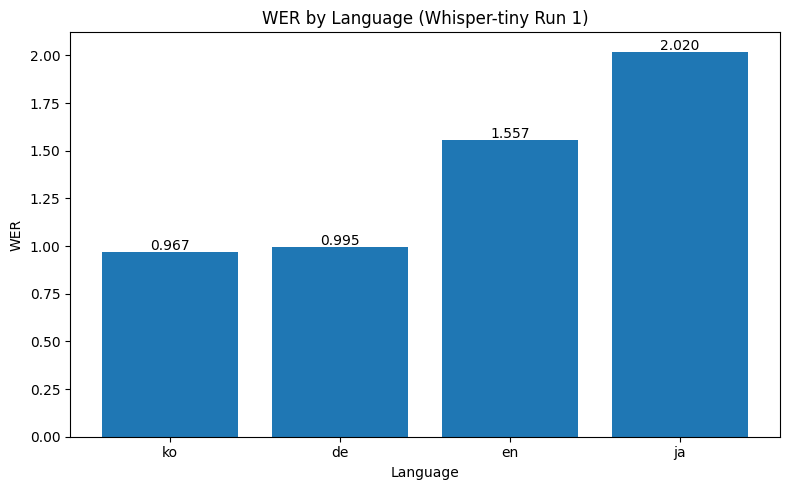

In [10]:
import matplotlib.pyplot as plt
import numpy as np

print("\n📊 WER 결과 (낮을수록 정확)")
for lang, score in sorted(lang_wer_results.items(), key=lambda x: x[1]):
    print(f"{lang.upper()} : {score:.4f}")

langs_sorted = [x[0] for x in sorted(lang_wer_results.items(), key=lambda x: x[1])]
scores_sorted = [x[1] for x in sorted(lang_wer_results.items(), key=lambda x: x[1])]

plt.figure(figsize=(8,5))
plt.bar(langs_sorted, scores_sorted)
plt.title("WER by Language (Whisper-tiny Run 1)")
plt.xlabel("Language")
plt.ylabel("WER")

for i, v in enumerate(scores_sorted):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center')

plt.tight_layout()
plt.savefig("wer_tiny_run1.png")
plt.show()

  tiny	lr1	   lr2
- KO:	5.4171 ->	0.9673
- EN:	4.6523 ->	1.5566
- JA:	31.3300 -> 2.0200
- DE:	4.2576 ->	0.9953